In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
df_all_countries = pd.read_excel('/content/drive/My Drive/Data Science & Big Data Project/Proj1_test/2023_Data_Tables.xlsx',
                   sheet_name = 'Countries & Regions',skiprows=1)

In [45]:
df_all_countries = df_all_countries.iloc[:71,:2]

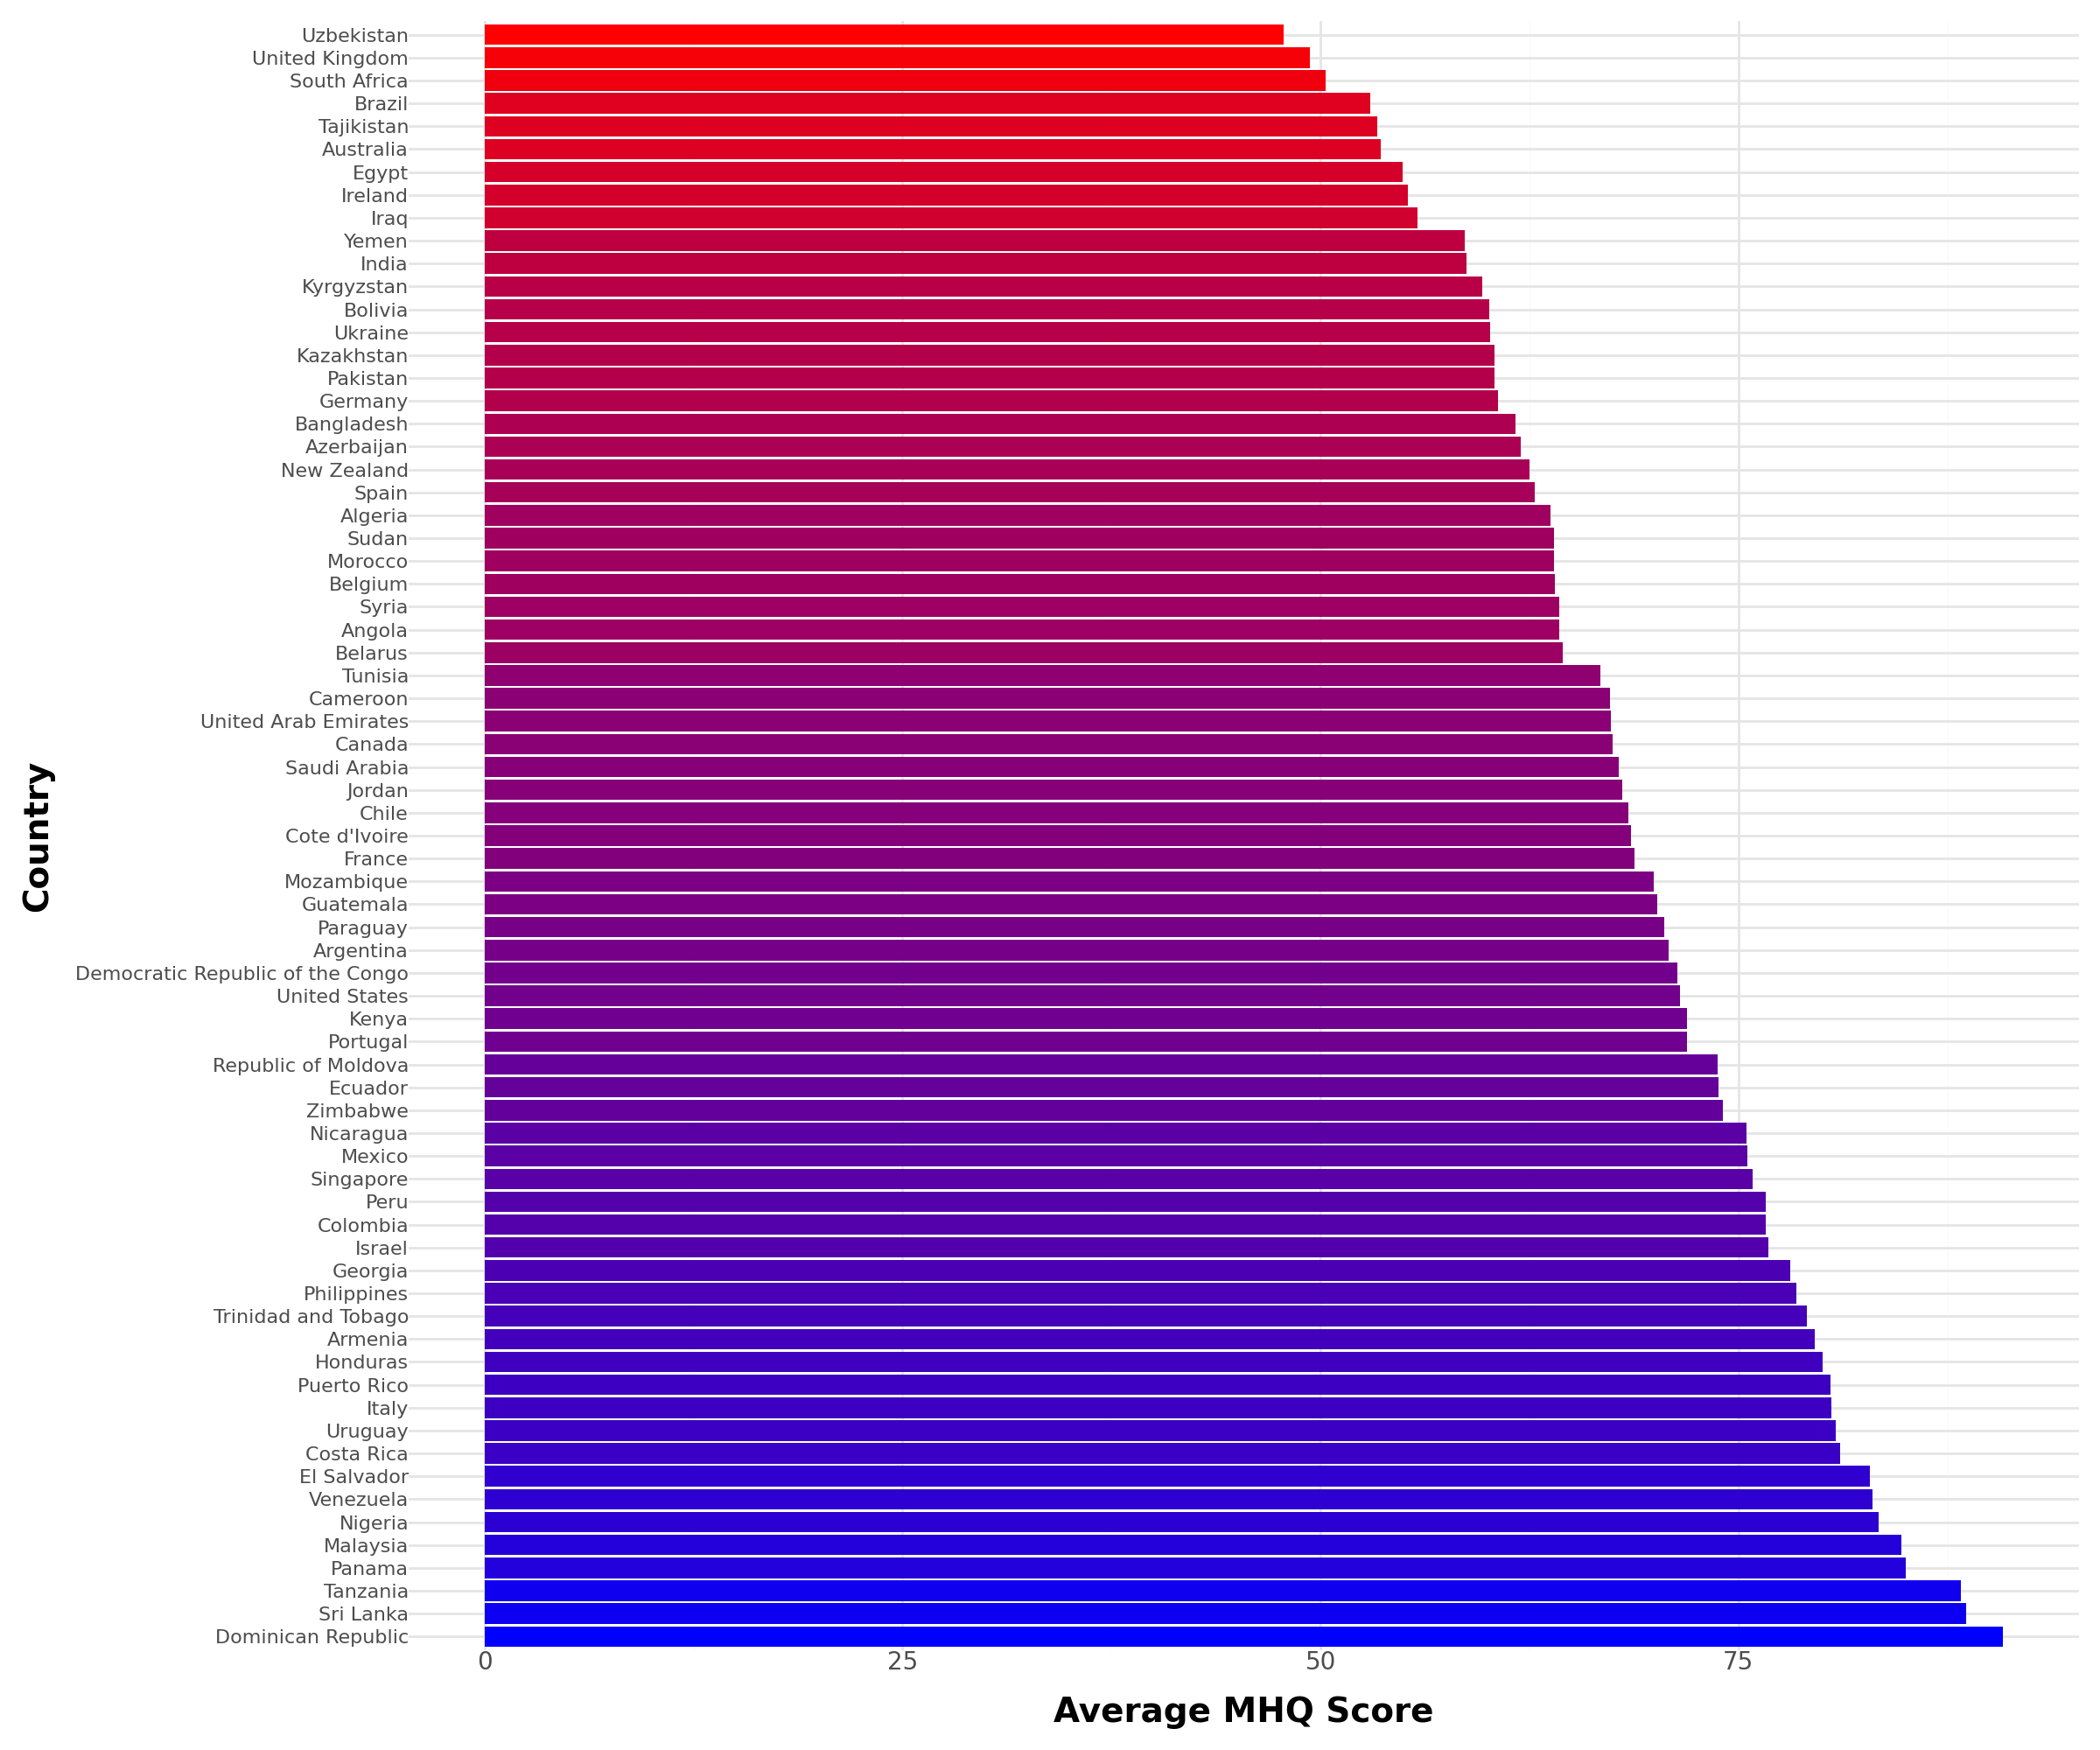

In [54]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_bar, coord_flip, theme_minimal, labs,
    scale_fill_gradient, theme, element_text
)

# Convert "Average MHQ Score" to numeric
df_all_countries_sorted["Average MHQ Score"] = pd.to_numeric(df_all_countries_sorted["Average MHQ Score"], errors="coerce")

# Drop NaN values
df_all_countries_sorted = df_all_countries_sorted.dropna(subset=["Average MHQ Score"])

# Sort in descending order **before plotting**
df_all_countries_sorted = df_all_countries_sorted.sort_values(by="Average MHQ Score", ascending=True)

# Ensure "Country" is treated as a categorical variable with ordering (REVERSED for correct order)
df_all_countries_sorted["Country"] = pd.Categorical(
    df_all_countries_sorted["Country"],
    categories=df_all_countries_sorted["Country"][::-1],  # Reverse order
    ordered=True
)

# Create the plot
plot = (
    ggplot(df_all_countries_sorted, aes(x="Country", y="Average MHQ Score", fill="Average MHQ Score"))
    + geom_bar(stat="identity", show_legend=False)  # Bar plot
    + coord_flip()  # Flip for better readability
    + scale_fill_gradient(high="blue",low="red")  # Color gradient

    + theme_minimal()  # Clean theme
    + labs(
        x="Country",
        y="Average MHQ Score"
    )

    # Improve readability of text
    + theme(
        figure_size=(12, 10),  # Increase size
        axis_text_y=element_text(size=8),  # Reduce font size for country names
        axis_text_x=element_text(size=10),
        title=element_text(size=14, weight="bold")
    )
)

plot

In [ ]:
df = pd.read_excel('/content/drive/My Drive/Data Science & Big Data Project/Proj1_test/mhq_country.xlsx',
                   sheet_name = '2020-2022 Change',skiprows=2)

In [ ]:
df.columns

Index(['Country', 2020, 2021, 2022, '% 2021-2022 Change', 'Unnamed: 5'], dtype='object')

In [ ]:
cols = ['Country', 2020, 2021, 2022, '% 2021-2022 Change']
country_level_mhq = df[cols][:8]

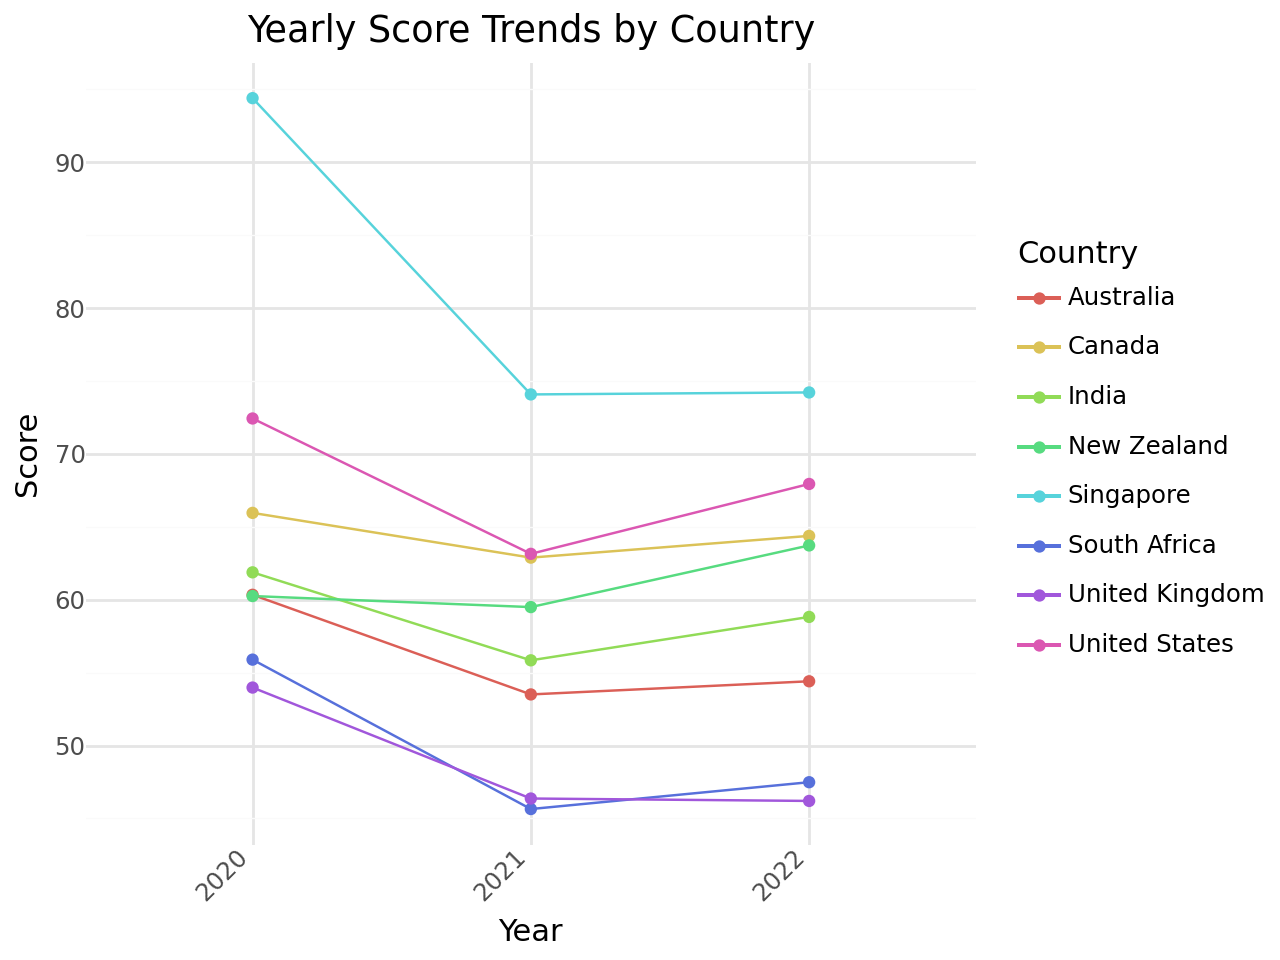

In [ ]:
from plotnine import ggplot, aes, geom_bar, theme_minimal, labs, scale_y_continuous, theme, element_text, geom_line, geom_point
df = country_level_mhq[['Country', 2020, 2021, 2022]]

# Reshape the data to long format
df_long = df.melt(id_vars=['Country'], value_vars=[2020, 2021, 2022],
                  var_name='Year', value_name='MHQ Score')

# Create the plot using plotnine
plot = (ggplot(df_long, aes(x='Year', y='MHQ Score', group='Country', color='Country')) +
        geom_line() +  # Line plot
        geom_point() +  # Add points for better visibility
        theme_minimal() +
        labs(title='Yearly Score Trends by Country',
             x='Year', y='Score') +
        theme(axis_text_x=element_text(rotation=45, hjust=1)))  # Rotate X-axis labels for clarity

# Show the plot
plot

/usr/local/lib/python3.11/dist-packages/plotnine/themes/themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


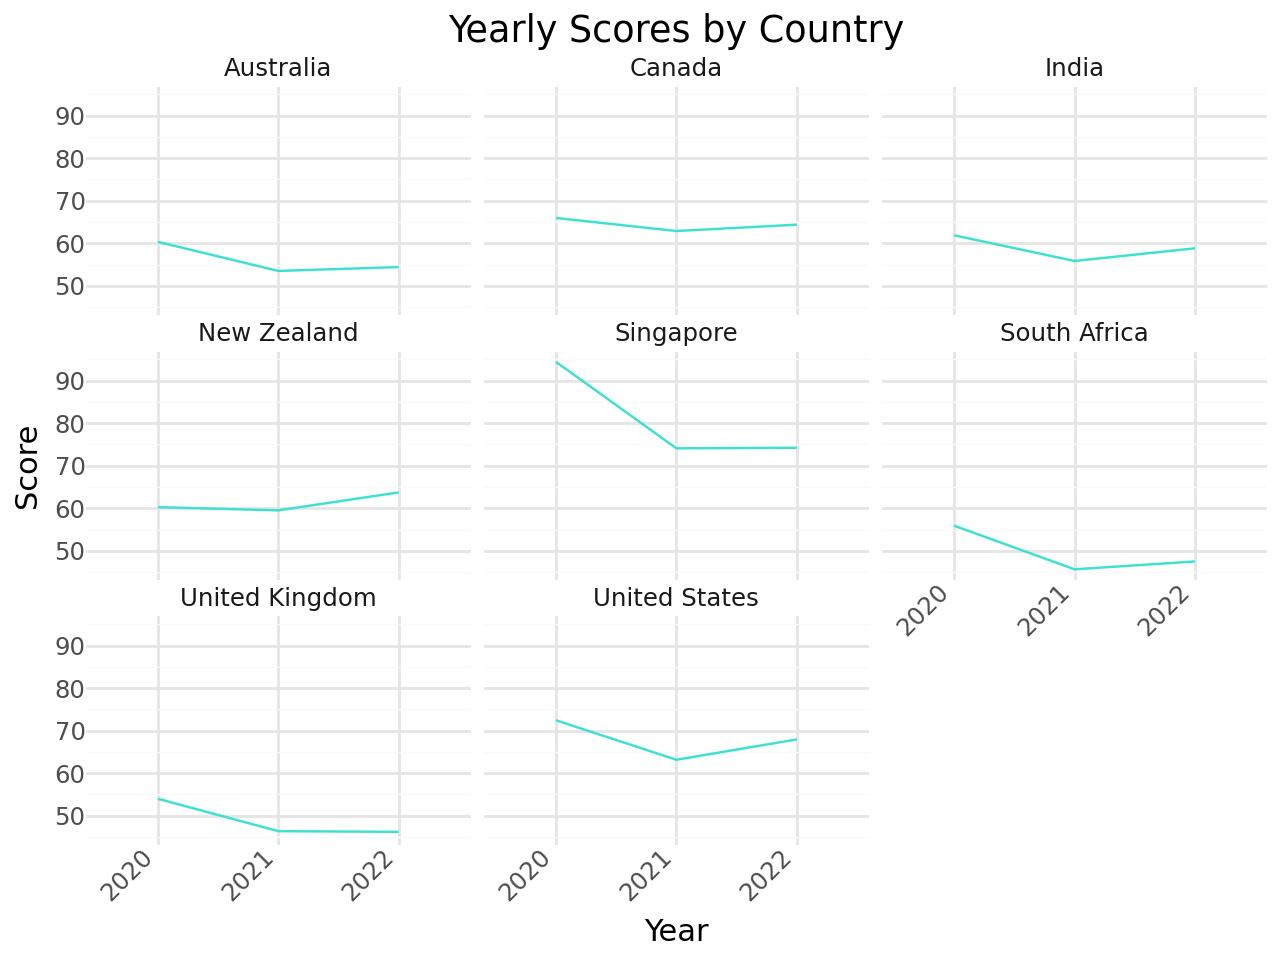

In [ ]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, facet_wrap, theme_minimal, labs, element_text, theme

# Sample data: reshape your DataFrame to long format first
# Assume df has columns: ['Country', 2020, 2021, 2022]
df_long = df.melt(id_vars=['Country'], value_vars=[2020, 2021, 2022],
                  var_name='Year', value_name='Score')
df_long['Year'] = df_long['Year'].astype(str)  # Convert Year to string

# Create faceted plot: one plot per country
plot = (ggplot(df_long, aes(x='Year', y='Score', group=1)) +
        geom_line(color='turquoise') +
        facet_wrap('~Country') +
        theme_minimal() +
        labs(title='Yearly Scores by Country',
             x='Year',
             y='Score') +
        theme(axis_text_x=element_text(rotation=45, hjust=1),
              subplots_adjust={'wspace': 0.25, 'hspace': 0.25}))

plot

In [ ]:
age_gender_data = pd.read_excel('/content/drive/My Drive/Data Science & Big Data Project/Proj1_test/mhq_country.xlsx',
                   sheet_name = 'Age x Gender',skiprows=3)

In [ ]:
age_gender_data.head()

,Country,18-24,25-34,35-44,45-54,55-64,65-74,75+,18-24.1,25-34.1,...,55-64.1,65-74.1,75+.1,18-24.2,25-34.2,35-44.2,45-54.2,55-64.2,65-74.2,75+.2
0,Algeria,41.537469,55.202369,71.845372,80.766087,90.870119,88.949819,87.970536,30.800539,51.898195,...,82.630275,95.76413,100.360345,-10.73693,-3.304174,-6.455537,-3.453402,-8.239843,6.814312,12.389809
1,Angola,63.329201,74.279941,86.856842,103.366667,111.666327,98.605882,116.366667,26.151036,52.013582,...,90.548101,76.642105,114.216667,-37.178165,-22.266359,-10.458019,-24.439247,-21.118225,-21.963777,-2.15
2,Argentina,40.550159,54.666118,79.933659,92.95683,106.958365,115.850679,110.989456,6.042821,39.68284,...,97.297292,107.54192,111.226701,-34.507338,-14.983278,-10.054345,-10.736814,-9.661072,-8.308759,0.237245
3,Australia,33.472506,30.994273,42.039103,50.127341,57.989189,88.268333,114.024653,8.398517,29.841667,...,67.233966,94.17561,110.748797,-25.073989,-1.152606,-1.679714,3.35698,9.244777,5.907276,-3.275856
4,Austria,57.488889,44.8,71.525,64.305,80.675,96.385,94.606667,40.873684,26.756522,...,74.090055,105.716667,78.525,-16.615205,-18.043478,-0.293116,9.655,-6.584945,9.331667,-16.081667


In [120]:
age_gender_data.columns

Index(['Country', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+',
       '18-24.1', '25-34.1', '35-44.1', '45-54.1', '55-64.1', '65-74.1',
       '75+.1', '18-24.2', '25-34.2', '35-44.2', '45-54.2', '55-64.2',
       '65-74.2', '75+.2'],
      dtype='object')

<ipython-input-129-819ea517fe99>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.11/dist-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 3 rows containing missing values.
/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 25 rows containing missing values.


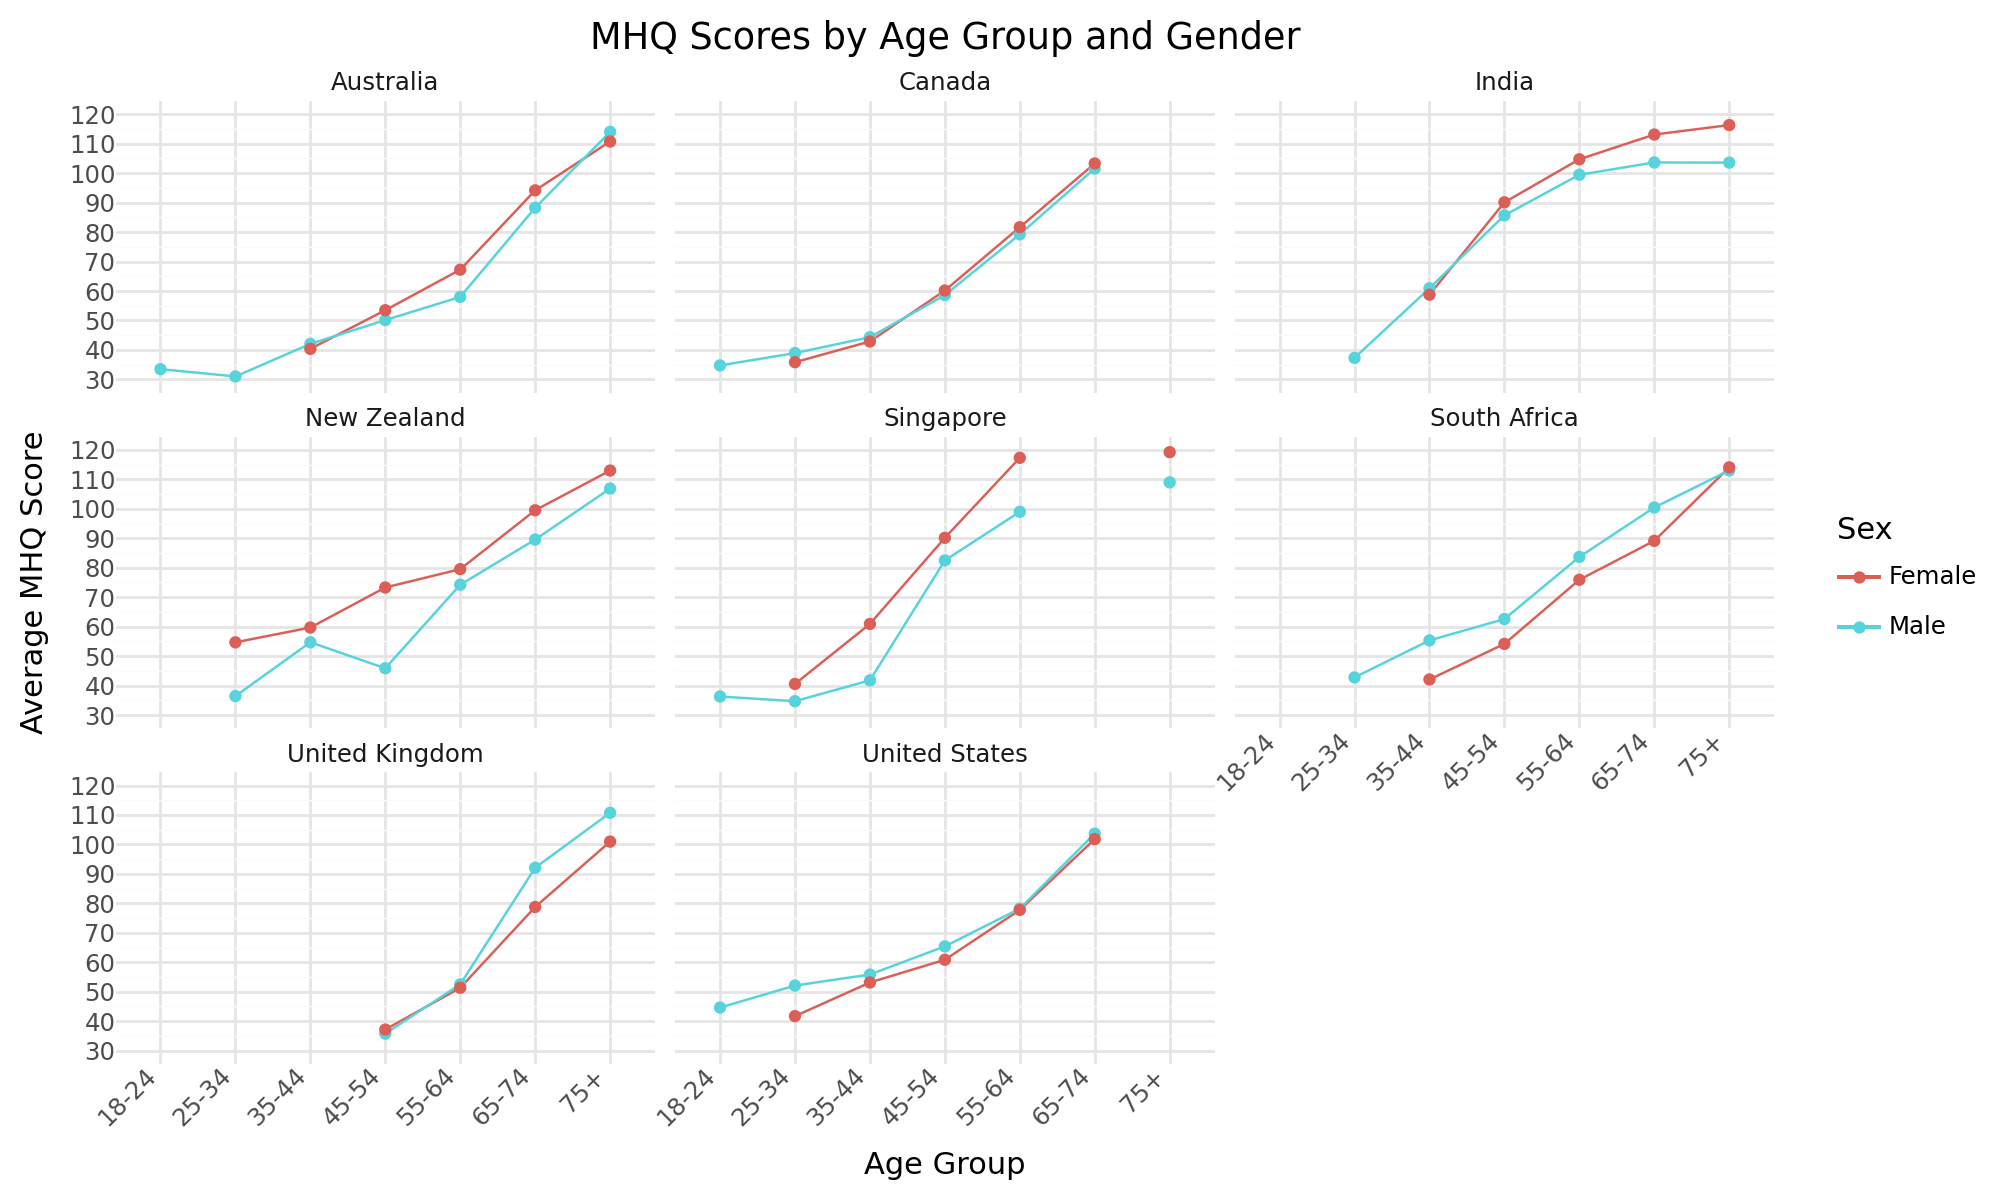

In [129]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, facet_wrap, theme_minimal, labs, element_text, theme

male_cols = ['Country', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
female_cols = ['Country', '18-24.1', '25-34.1', '35-44.1', '45-54.1', '55-64.1', '65-74.1',
       '75+.1']


#Melt (reshape) Males
df_male = age_gender_data[male_cols].iloc[:64].melt(
    id_vars='Country',
    var_name='AgeGroup',
    value_name='MHQ_Score'
)
df_male['Sex'] = 'Male'

#Melt (reshape) Females

df_female = age_gender_data[female_cols].iloc[:64].melt(
    id_vars='Country',
    var_name='AgeGroup',
    value_name='MHQ_Score'
)
df_female['Sex'] = 'Female'

df_female['AgeGroup'] = df_female['AgeGroup'].str.replace('.1', '', regex=False)

# Combine Male & Female data
df_long = pd.concat([df_male,df_female], ignore_index=True)

# Filter for specific countries of interest
countries_of_interest = ['United States','India','Australia','United Kingdom','New Zealand','Singapore','Canada', 'South Africa']
df_filtered = df_long[df_long['Country'].isin(countries_of_interest)]

df_filtered['MHQ_Score'] = pd.to_numeric(df_filtered['MHQ_Score'], errors='coerce')

# 7. Plot a line chart comparing M vs. F across age groups for each country
plot = (
    ggplot(df_filtered, aes(x='AgeGroup', y='MHQ_Score', color='Sex', group='Sex')) +
    geom_line() +
    geom_point() +
    facet_wrap('~Country') +  # separate panel for each country
    theme_minimal() +
    labs(
        title='MHQ Scores by Age Group and Gender',
        x='Age Group',
        y='Average MHQ Score'
    ) +
    theme(
        axis_text_x=element_text(rotation=45, hjust=1),
        figure_size=(10, 6)
    ) +
    scale_y_continuous(limits=(30, 120), breaks=range(30, 121, 10))
)
plot


In [179]:
df_2023 = pd.read_excel('/content/drive/My Drive/Data Science & Big Data Project/Proj1_test/2023_Data_Tables.xlsx',
                   sheet_name = 'Employment',skiprows=3)

In [180]:
df_2023 = df_2023.iloc[:71,:7]

/usr/local/lib/python3.11/dist-packages/plotnine/themes/themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


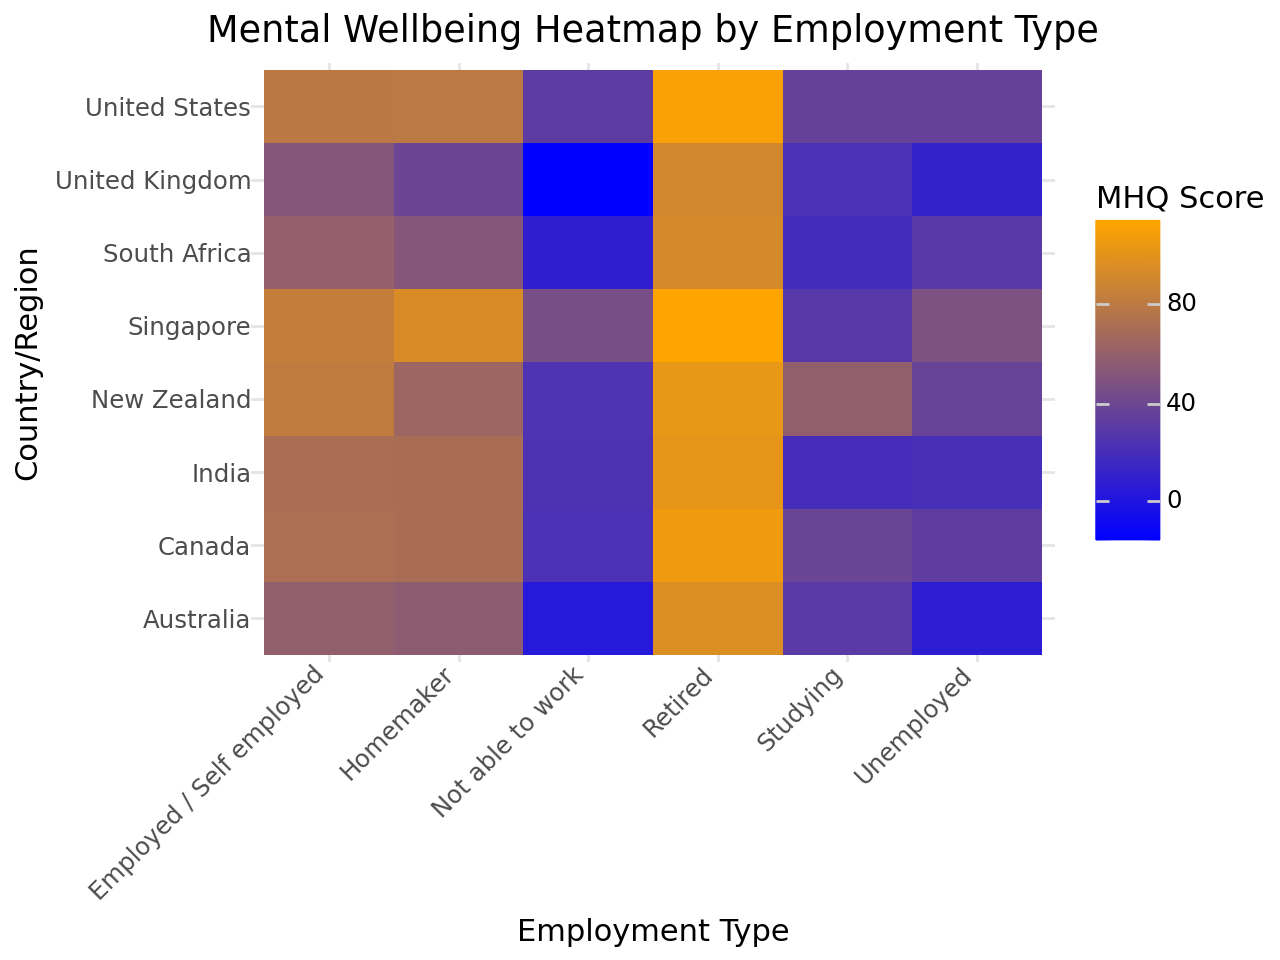

In [187]:
import pandas as pd
from plotnine import ggplot, aes, geom_tile, scale_fill_gradient, theme_minimal, labs

for col in df_2023.columns[1:]:
    df_2023[col] = pd.to_numeric(df_2023[col], errors="coerce")

# Melt dataframe into long format
df_melted = df_2023.melt(id_vars=["Country/Region"], var_name="Employment_Type", value_name="MHQ_Score")

# Drop any rows with NaN values
df_melted = df_melted.dropna()

countries_of_interest = ['United States','India','Australia','United Kingdom','New Zealand','Singapore','Canada', 'South Africa']
df_filtered = df_melted[df_melted['Country/Region'].isin(countries_of_interest)]

# Create heatmap using plotnine
plot = (
    ggplot(df_filtered, aes(x="Employment_Type", y="Country/Region", fill="MHQ_Score"))
    + geom_tile()
    + scale_fill_gradient(low="blue", high="orange")  # Adjust color scale for better readability
    + theme_minimal()
    + labs(title="Mental Wellbeing Heatmap by Employment Type",
           x="Employment Type",
           y="Country/Region",
           fill="MHQ Score")
    +
        theme(axis_text_x=element_text(rotation=45, hjust=1),
              subplots_adjust={'wspace': 0.25, 'hspace': 0.25})
)
plot

In [56]:
attributes = pd.read_excel('/content/drive/My Drive/Data Science & Big Data Project/Proj1_test/factors.xlsx',
                   sheet_name = 'Sheet1',skiprows=3)

In [57]:
selected = [4,7,10,13,16,19,22,25]
exercise_df = attributes.iloc[107:109,selected]

new_index = ["Exercise Daily", "Do Not Exercise"]

# Assign the new index to exercise_df
exercise_df.index = new_index

# Display the modified DataFrame
exercise_df

,United States,United Kingdom,India,Canada,Australia,New Zealand,South Africa,Singapore
Exercise Daily,91.234815,64.997683,80.628652,84.852057,78.789344,70.447416,60.534951,123.662374
Do Not Exercise,42.128245,24.710289,38.523407,38.731942,29.709905,33.243735,36.653333,45.036502


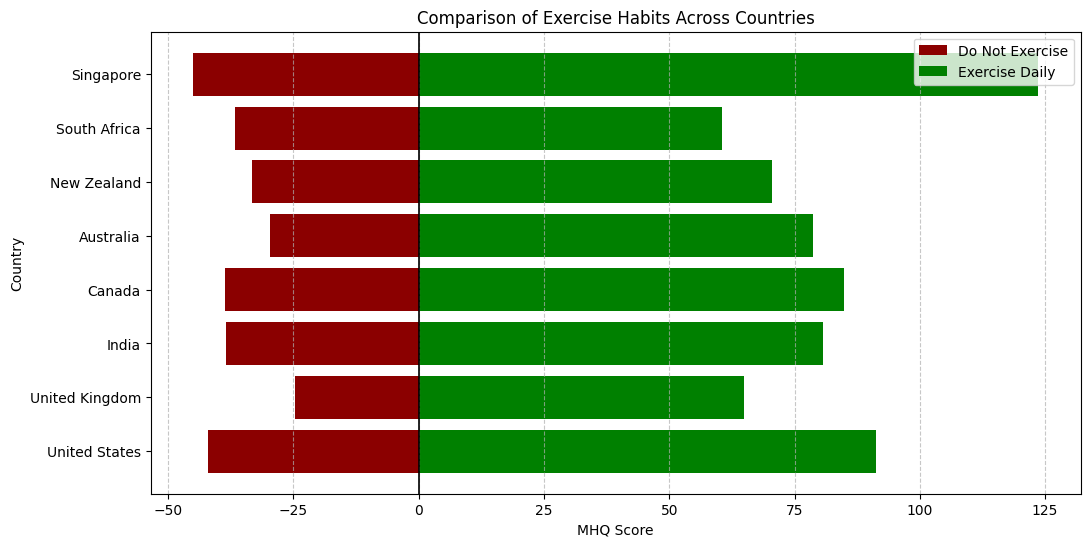

In [58]:
import matplotlib.pyplot as plt

# Transpose the DataFrame
exercise_df_T = exercise_df.T

# Define categories
countries = exercise_df_T.index
exercise_daily = exercise_df_T.iloc[:, 0]  # First column (e.g., Exercise Daily)
no_exercise = -exercise_df_T.iloc[:, 1]  # Second column (e.g., No Exercise) (Negative for left-side bars)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Horizontal bars (Back-to-Back)
ax.barh(countries, no_exercise, color="darkred", label="Do Not Exercise")
ax.barh(countries, exercise_daily, color="green", label="Exercise Daily")

# Labels and Title
ax.set_xlabel("MHQ Score")
ax.set_ylabel("Country")
ax.set_title("Comparison of Exercise Habits Across Countries")

# Add a vertical line at 0 for separation
ax.axvline(0, color="black", linewidth=1.2)

# Legend
ax.legend(loc="upper right")

# Grid
ax.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [92]:
selected = [4,7,10,13,16,19,22,25]
sleep_df = attributes.iloc[99:101,selected]

new_index = ["Good sleep", "No good sleep"]

# Assign the new index to exercise_df
sleep_df.index = new_index

# Display the modified DataFrame
sleep_df

,United States,United Kingdom,India,Canada,Australia,New Zealand,South Africa,Singapore
Good sleep,109.535236,84.392112,87.384653,95.608058,109.377973,109.741575,71.221311,114.963315
No good sleep,23.861536,8.331861,8.556692,17.926363,14.454089,15.00074,10.263195,22.219583


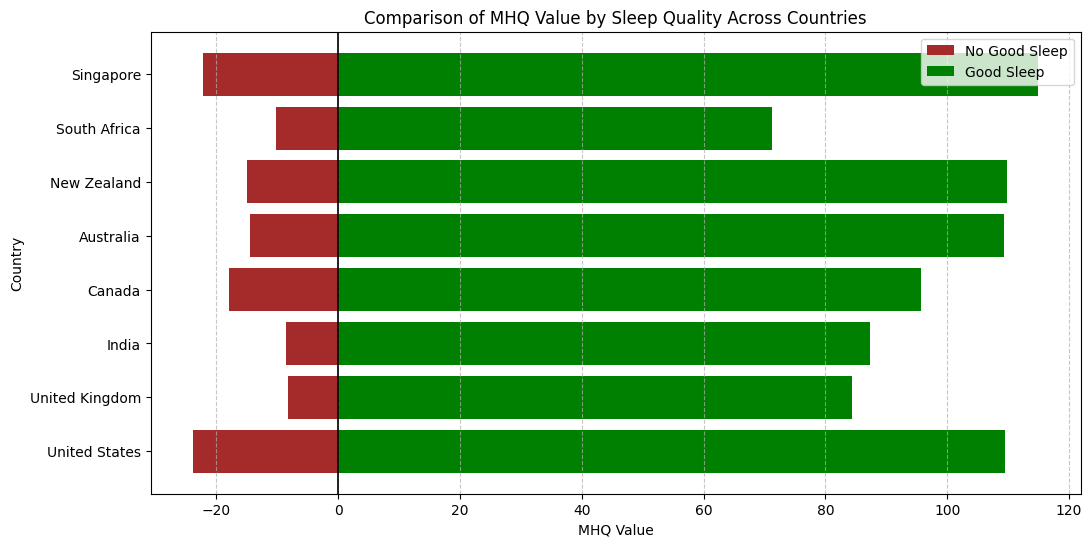

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Transpose the DataFrame for better visualization
sleep_df_T = sleep_df.T

# Define categories
countries = sleep_df_T.index
good_sleep = sleep_df_T["Good sleep"]
no_good_sleep = -sleep_df_T["No good sleep"]  # Negative values for left-side bars

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot horizontal bars
ax.barh(countries, no_good_sleep, color="brown", label="No Good Sleep")
ax.barh(countries, good_sleep, color="green", label="Good Sleep")

# Labels and title
ax.set_xlabel("MHQ Value")
ax.set_ylabel("Country")
ax.set_title("Comparison of MHQ Value by Sleep Quality Across Countries")

# Add a vertical line at 0 for separation
ax.axvline(0, color="black", linewidth=1.2)

# Add legend
ax.legend(loc="upper right")

# Grid
ax.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()


**COVID 19 IMPACT**

,United States,United Kingdom,India,Canada,Australia,New Zealand,South Africa
Mild Infection,74.63251,59.025878,62.955796,47.008624,78.163722,7.226735,42.860976
Severe Infection,65.641487,45.98901,31.174114,68.379529,64.321462,31.858061,50.861161
Close Family Severe Infection,67.759246,44.193543,63.301638,63.074287,57.570522,39.801888,66.149992
Family Death,68.180216,23.810373,56.604419,37.971163,62.469908,6.010673,31.792673
Lack of Healthcare,25.278383,4.86903,15.168124,15.055178,-16.574772,-9.254732,50.578659
Family Can't Access Healthcare,55.582421,35.145262,47.24384,57.062765,38.691489,97.645781,64.722922


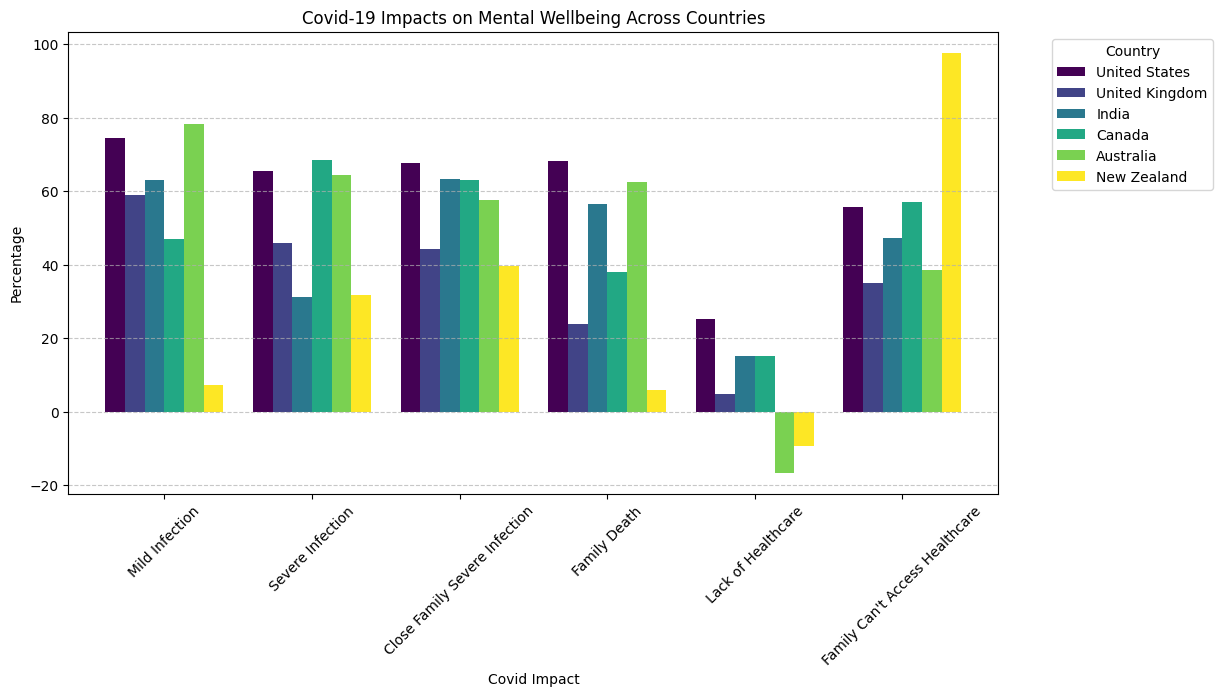

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the screenshot
data = {
    "Covid Impact": [
        "Mild Infection", "Severe Infection", "Close Family Severe Infection",
        "Family Death", "Lack of Healthcare", "Family Can't Access Healthcare"
    ],
    "United States": [74.6, 65.6, 67.8, 68.2, 25.3, 55.6],
    "United Kingdom": [59.0, 46.0, 44.2, 23.8, 4.9, 35.1],
    "India": [63.0, 31.2, 63.3, 56.6, 15.2, 47.2],
    "Canada": [47.0, 68.4, 63.1, 38.0, 15.1, 57.1],
    "Australia": [78.2, 64.3, 57.6, 62.5, -16.6, 38.7],
    "New Zealand": [7.2, 31.9, 39.8, 6.0, -9.3, 97.6]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set "Covid Impact" as index
df.set_index("Covid Impact", inplace=True)

# Plot grouped bar chart
df.plot(kind="bar", figsize=(12, 6), width=0.8, colormap="viridis")

# Labels and title
plt.title("Covid-19 Impacts on Mental Wellbeing Across Countries")
plt.xlabel("Covid Impact")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [163]:
selected = [4,7,10,13,16,19,22]
covid19 = attributes.iloc[139:145,selected]

CovidImpact = ["Mild Infection", "Severe Infection", "Close Family Severe Infection",
        "Family Death", "Lack of Healthcare", "Family Can't Access Healthcare"]

# Assign the new index to exercise_df
covid19.index = CovidImpact
covid19

,United States,United Kingdom,India,Canada,Australia,New Zealand,South Africa
Mild Infection,74.63251,59.025878,62.955796,47.008624,78.163722,7.226735,42.860976
Severe Infection,65.641487,45.98901,31.174114,68.379529,64.321462,31.858061,50.861161
Close Family Severe Infection,67.759246,44.193543,63.301638,63.074287,57.570522,39.801888,66.149992
Family Death,68.180216,23.810373,56.604419,37.971163,62.469908,6.010673,31.792673
Lack of Healthcare,25.278383,4.86903,15.168124,15.055178,-16.574772,-9.254732,50.578659
Family Can't Access Healthcare,55.582421,35.145262,47.24384,57.062765,38.691489,97.645781,64.722922


In [164]:
# prompt: Using dataframe covid19: MAKE index as a column

# Reset the index of the DataFrame and make it a column named 'index'.
covid19 = covid19.reset_index()
covid19

,index,United States,United Kingdom,India,Canada,Australia,New Zealand,South Africa
0,Mild Infection,74.63251,59.025878,62.955796,47.008624,78.163722,7.226735,42.860976
1,Severe Infection,65.641487,45.98901,31.174114,68.379529,64.321462,31.858061,50.861161
2,Close Family Severe Infection,67.759246,44.193543,63.301638,63.074287,57.570522,39.801888,66.149992
3,Family Death,68.180216,23.810373,56.604419,37.971163,62.469908,6.010673,31.792673
4,Lack of Healthcare,25.278383,4.86903,15.168124,15.055178,-16.574772,-9.254732,50.578659
5,Family Can't Access Healthcare,55.582421,35.145262,47.24384,57.062765,38.691489,97.645781,64.722922


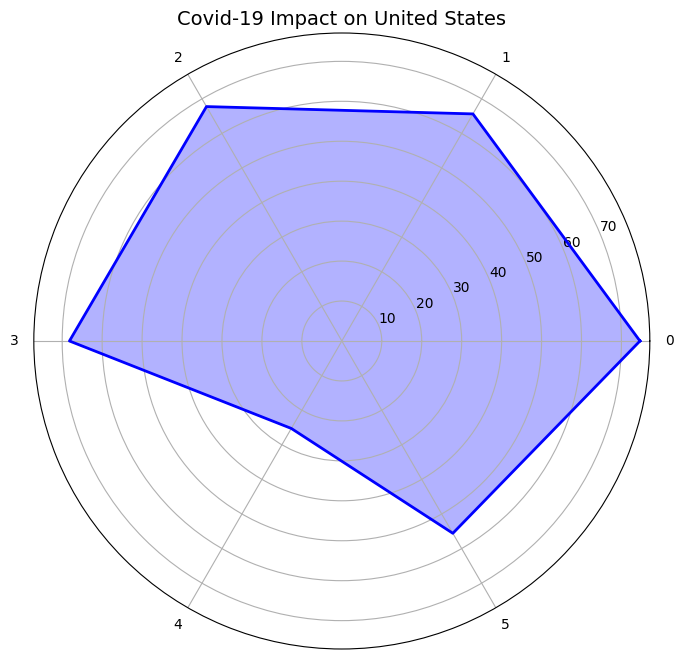

In [144]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming 'covid19' is your DataFrame
# df = covid19.copy()

# # Select the first country to plot (e.g., United States)
# country = "United States"
# values = df[country].values
# categories = df.index

# # Convert to angles for radial plot
# N = len(categories)
# angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# # Close the plot (repeat first value at the end for a full loop)
# values = np.concatenate((values, [values[0]]))
# angles += angles[:1]

# # Create polar plot
# fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# ax.fill(angles, values, color='blue', alpha=0.3)  # Filled area
# ax.plot(angles, values, color='blue', linewidth=2)  # Line plot

# # Set category labels
# ax.set_xticks(angles[:-1])
# ax.set_xticklabels(categories, fontsize=10)

# # Title
# plt.title(f'Covid-19 Impact on {country}', fontsize=14)

# plt.show()


In [155]:
covid19

,Covid Impact,level_0,Covid Impact,United States,United Kingdom,India,Canada,Australia,New Zealand,South Africa
0,0,0,Mild Infection,74.63251,59.025878,62.955796,47.008624,78.163722,7.226735,42.860976
1,1,1,Severe Infection,65.641487,45.98901,31.174114,68.379529,64.321462,31.858061,50.861161
2,2,2,Close Family Severe Infection,67.759246,44.193543,63.301638,63.074287,57.570522,39.801888,66.149992
3,3,3,Family Death,68.180216,23.810373,56.604419,37.971163,62.469908,6.010673,31.792673
4,4,4,Lack of Healthcare,25.278383,4.86903,15.168124,15.055178,-16.574772,-9.254732,50.578659
5,5,5,Family Can't Access Healthcare,55.582421,35.145262,47.24384,57.062765,38.691489,97.645781,64.722922


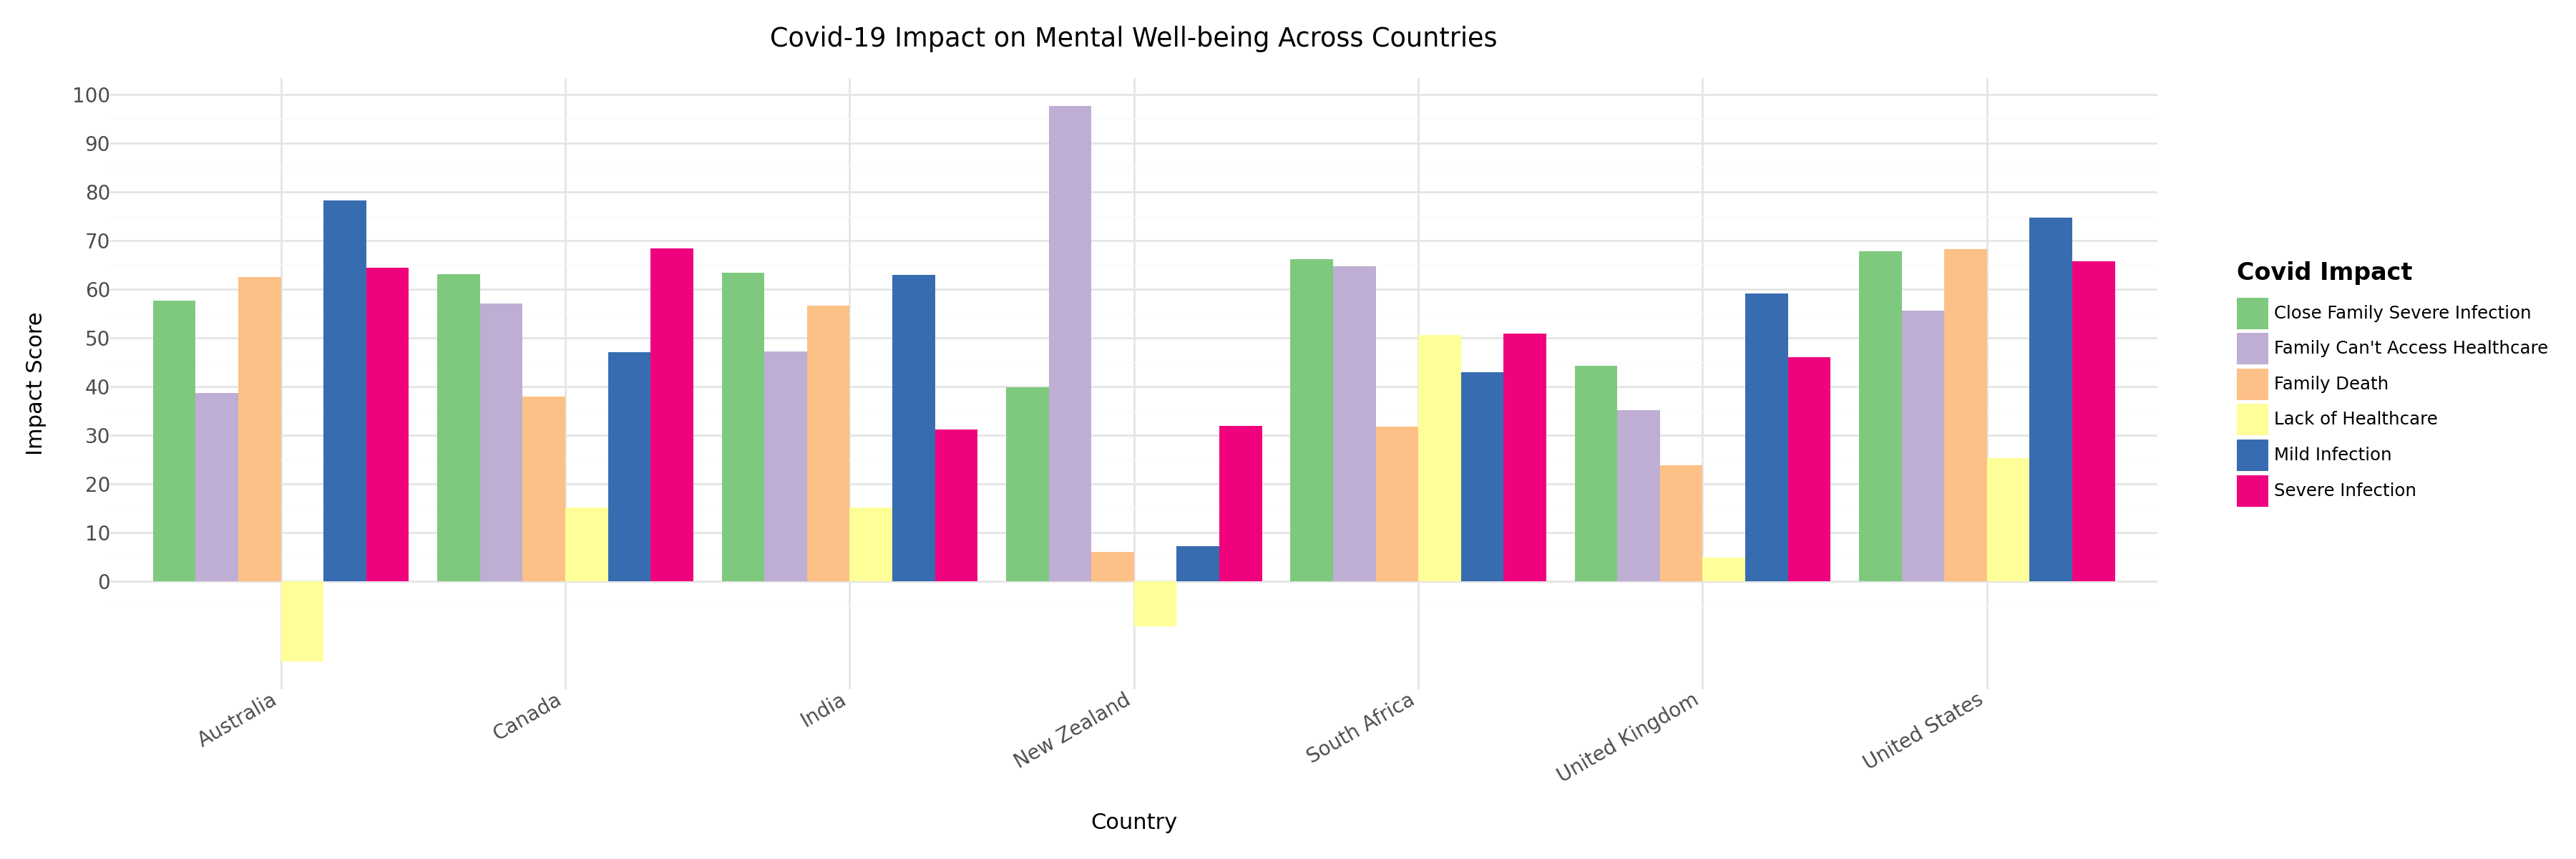

In [175]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, theme_minimal, labs, scale_fill_brewer, theme, element_text, scale_y_continuous

# Rename the 'index' column to 'Covid Impact'
covid19 = covid19.rename(columns={"index": "Covid Impact"})

# Convert DataFrame to long format for plotting
df_long = covid19.melt(id_vars="Covid Impact", var_name="Country", value_name="MHQ")

# Convert 'MHQ' column to numeric (fixing the error)
df_long["MHQ"] = pd.to_numeric(df_long["MHQ"], errors="coerce")

# Plot using plotnine
plot = (
    ggplot(df_long, aes(x="Country", y="MHQ", fill="Covid Impact")) +
    geom_bar(stat="identity", position="dodge") +  # Side-by-side bars
    theme_minimal() +
    scale_fill_brewer(type="qual") +  # Color styling
    labs(title="Covid-19 Impact on Mental Well-being Across Countries",
         x="Country",
         y="Impact Score",
         fill="Covid Impact") +
    scale_y_continuous(breaks=range(0, 110, 10)) +  # Round y-axis labels
    theme(
        axis_text_x=element_text(rotation=30, ha="right", size=10),  # Rotate x labels
        axis_text_y=element_text(size=10),
        legend_title=element_text(size=12, weight="bold"),
        legend_position="right",
        figure_size=(18, 6)  # Increase figure size for better spacing
    )
)

plot
